In [5]:
import pandas as pd
df = pd.read_csv('device_metrics.csv')

df.head(5)

,Mode,Date,Time,RTT,CPU,RAM,Latency,LossRate,Throughput,SuccessRate
0,Normal,2025-05-13,14:29:06,0.291701,49.0,78.4,0.145850,0.0,342.817257,100.0
1,Normal,2025-05-13,14:29:06,0.375835,39.6,78.5,0.187917,0.0,266.074249,100.0
2,Normal,2025-05-13,14:29:06,0.431841,51.8,78.4,0.215920,0.0,231.566894,100.0
3,DDoS,2025-05-13,14:29:06,0.516337,78.6,78.4,0.258169,100.0,19.367190,0.0
4,Normal,2025-05-13,14:29:06,0.583031,100.0,78.4,0.291515,0.0,171.517484,100.0


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mode         10000 non-null  object 
 1   Date         10000 non-null  object 
 2   Time         10000 non-null  object 
 3   RTT          10000 non-null  float64
 4   CPU          10000 non-null  float64
 5   RAM          10000 non-null  float64
 6   Latency      10000 non-null  float64
 7   LossRate     10000 non-null  float64
 8   Throughput   10000 non-null  float64
 9   SuccessRate  10000 non-null  float64
dtypes: float64(7), object(3)
memory usage: 781.4+ KB


In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

print("\nInspecting unique values for categorical columns:")
for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values")
    if df[col].nunique() < 50: # Arbitrary threshold to display value counts
        print(df[col].value_counts())
    else:
        print(" (Too many unique values to display all value counts)")

Numerical Columns: ['RTT', 'CPU', 'RAM', 'Latency', 'LossRate', 'Throughput', 'SuccessRate']
Categorical Columns: ['Mode', 'Date', 'Time']

Inspecting unique values for categorical columns:
Column 'Mode': 2 unique values
Mode
Normal    5090
DDoS      4910
Name: count, dtype: int64
Column 'Date': 1 unique values
Date
2025-05-13    10000
Name: count, dtype: int64
Column 'Time': 1907 unique values
 (Too many unique values to display all value counts)


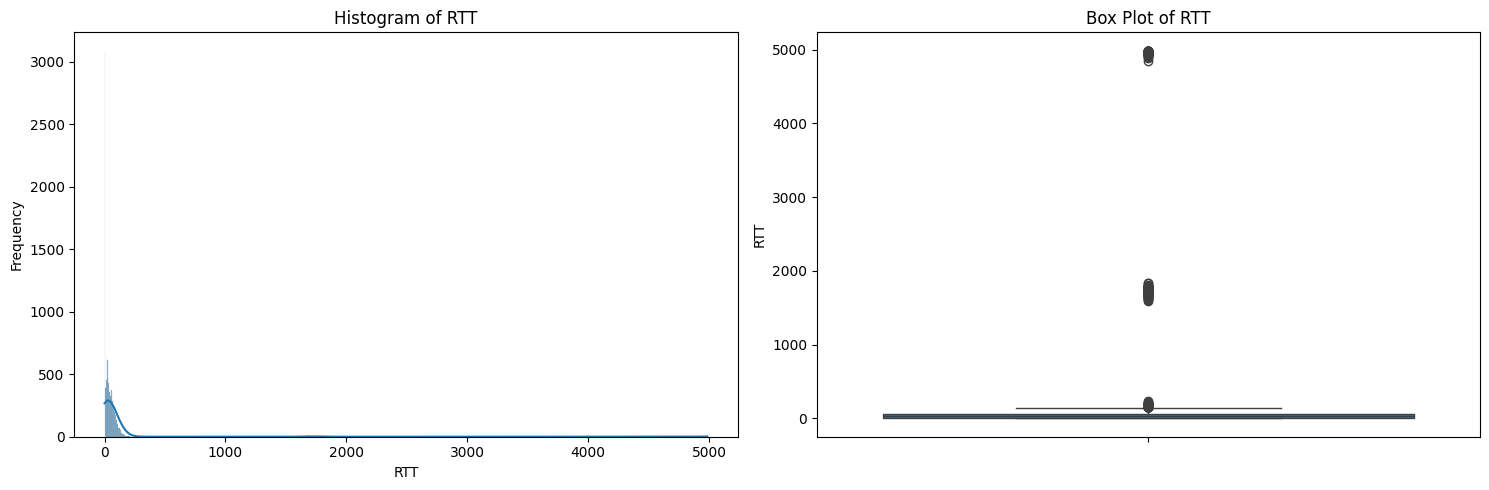

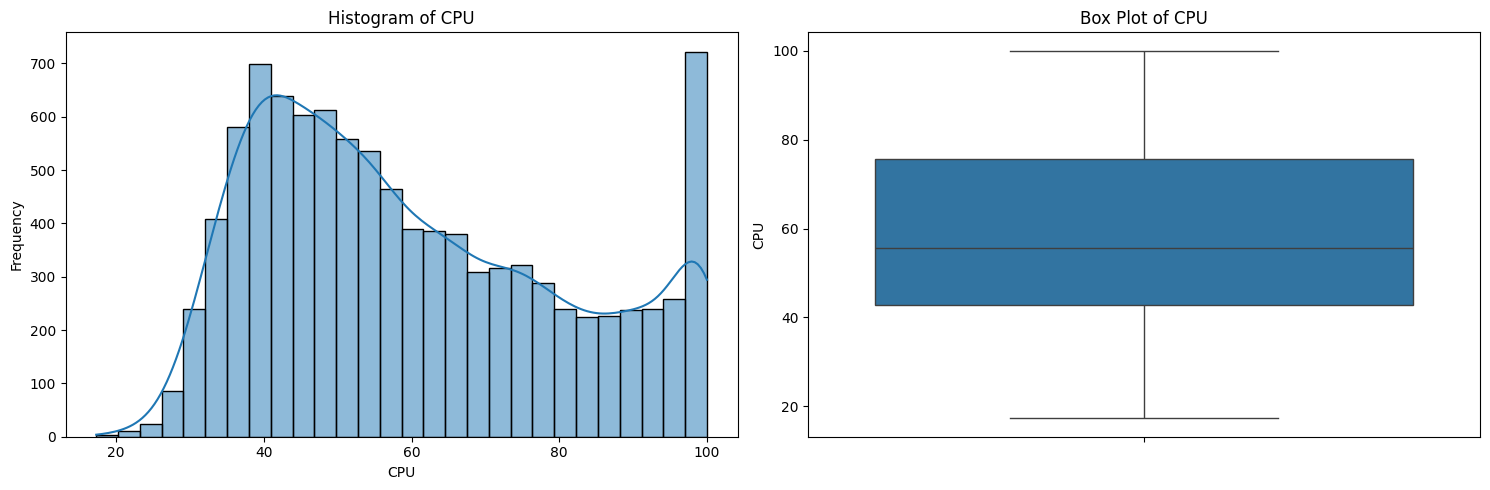

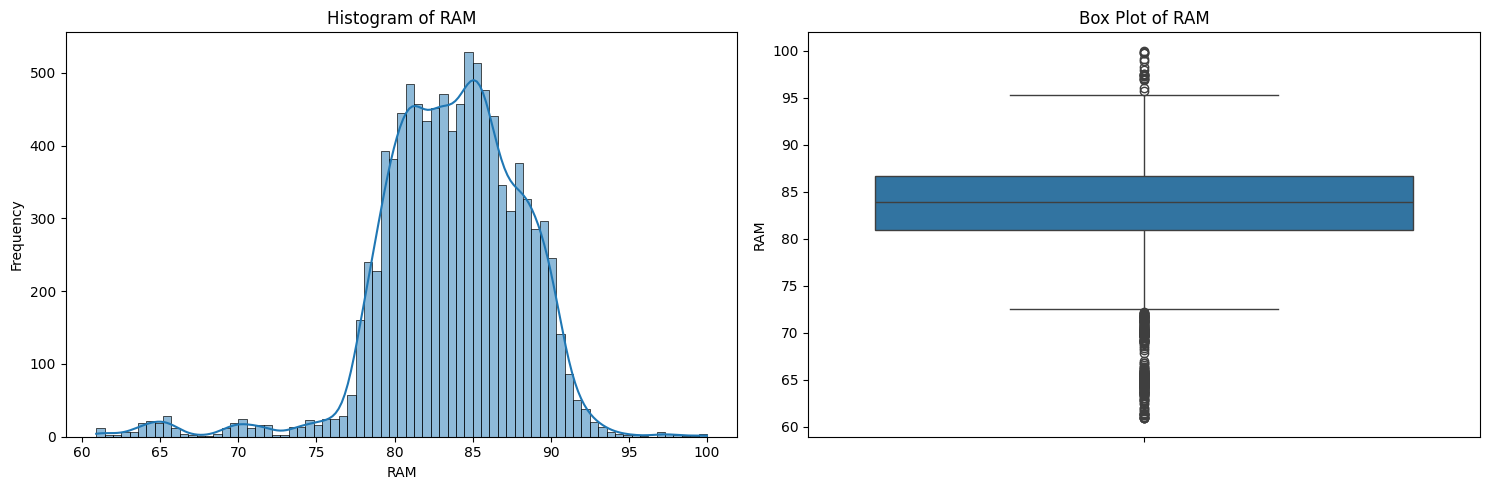

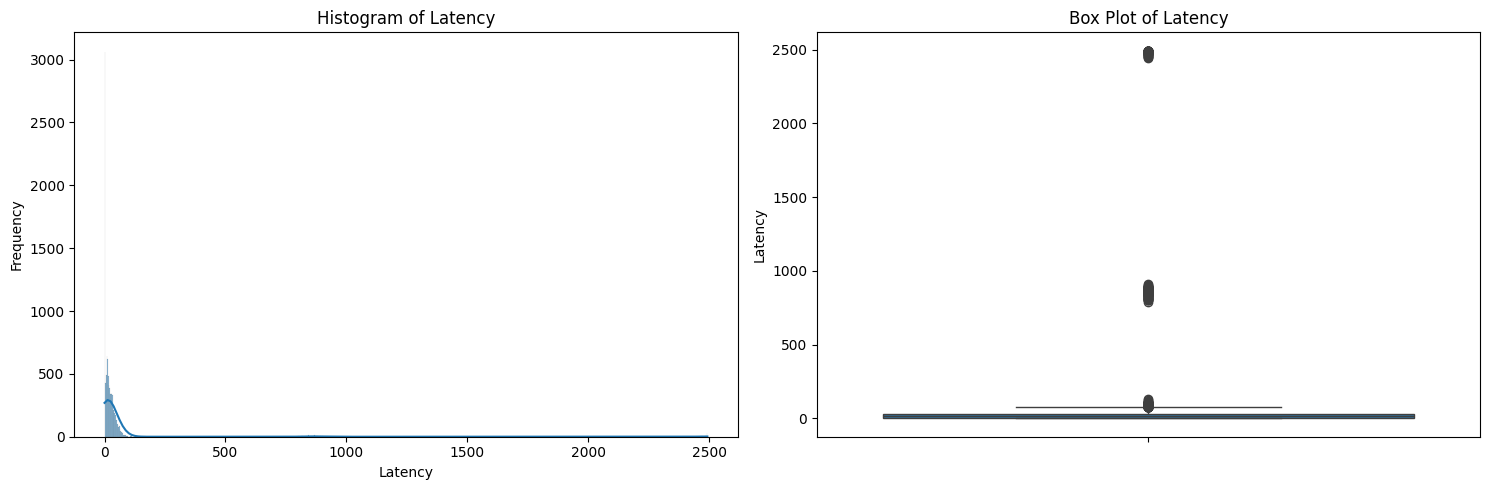

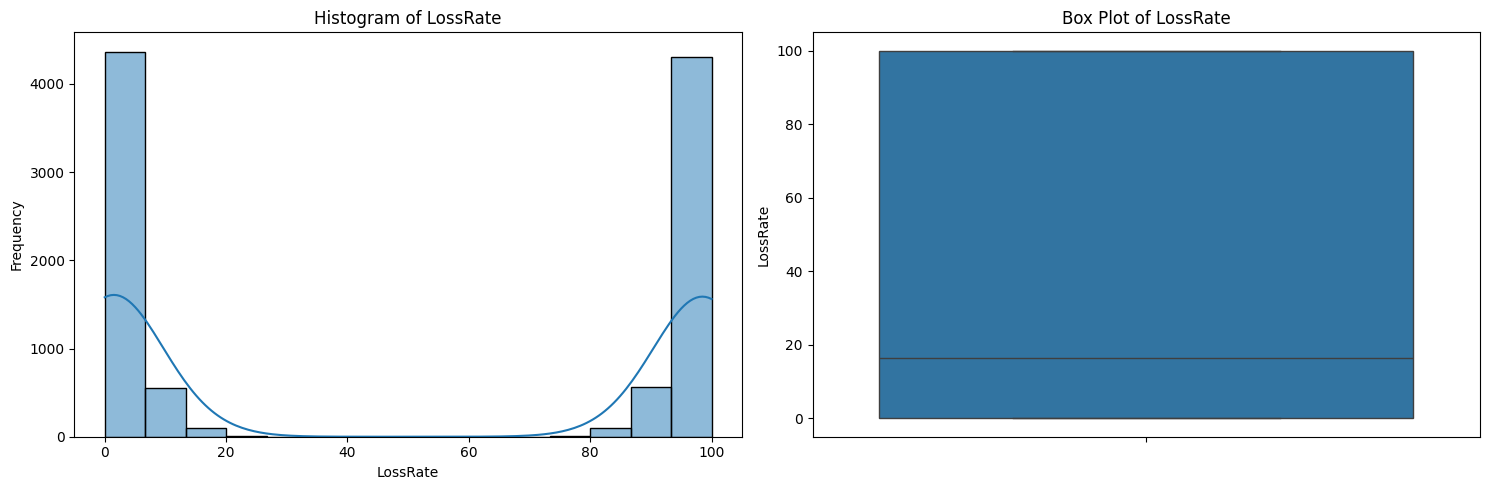

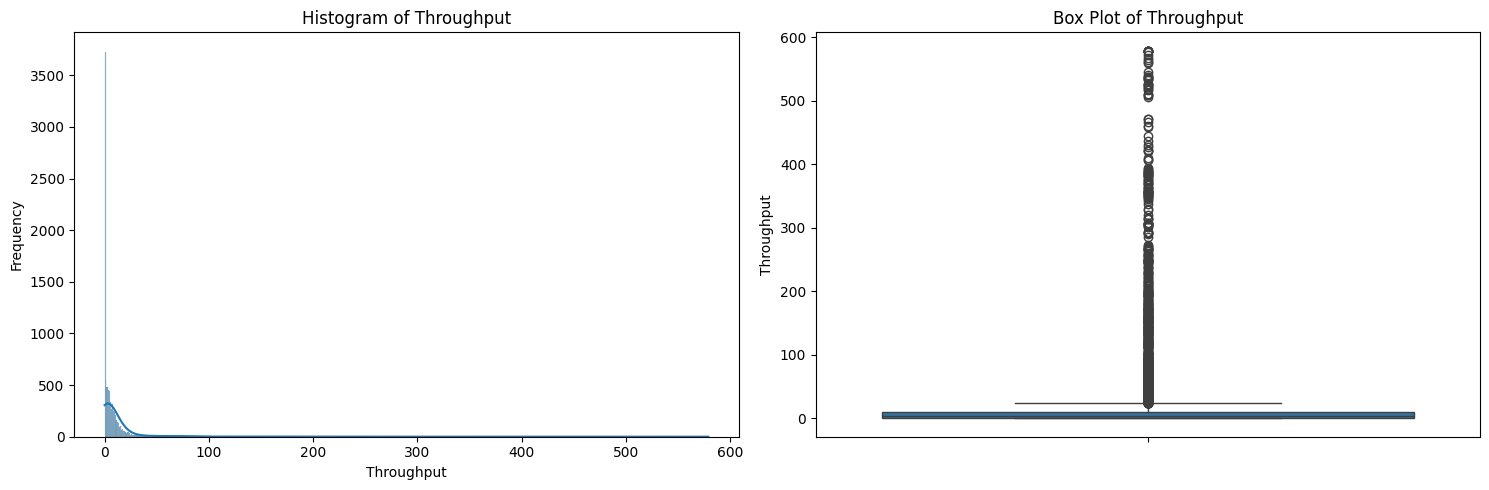

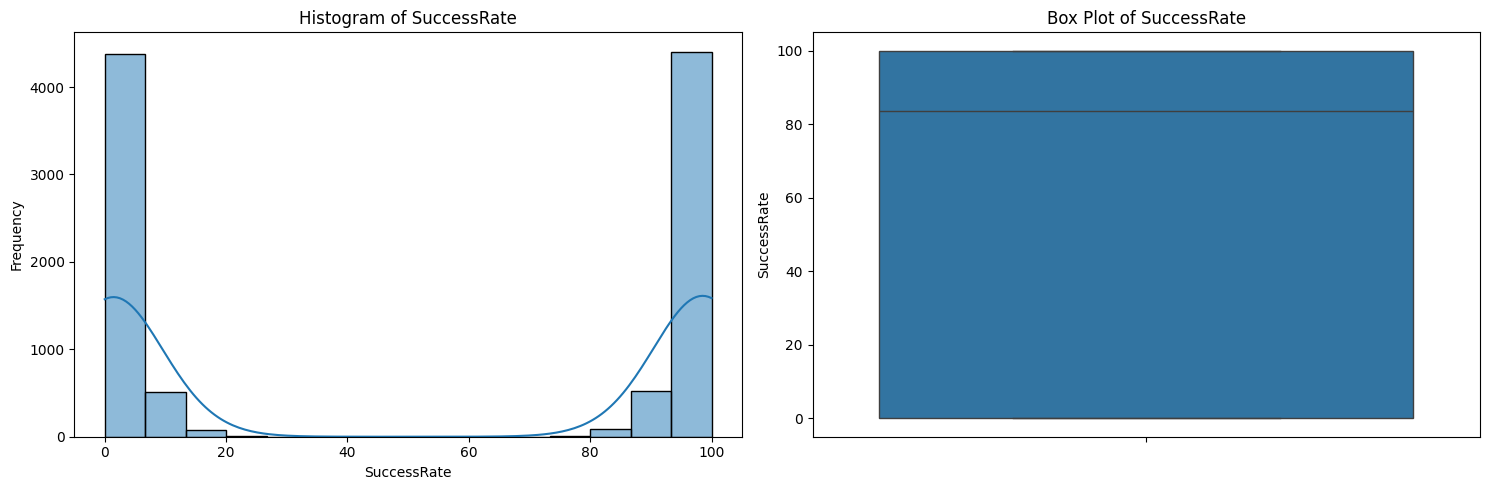

In [9]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()

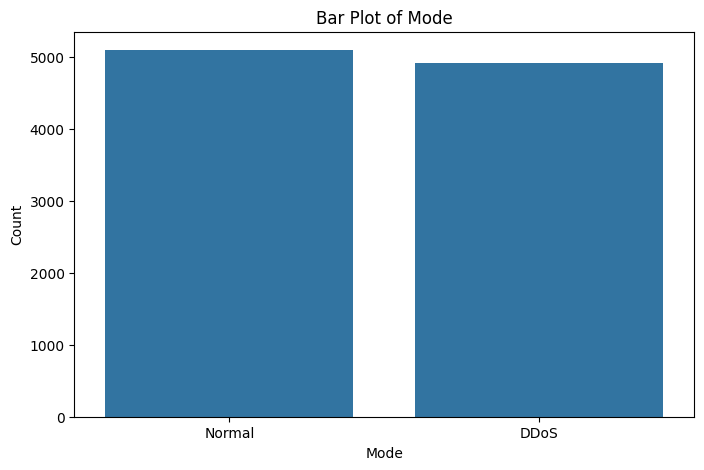

Skipping bar plot for 'Date' as it has only one unique value.
Skipping bar plot for 'Time' due to too many unique values (1907).


In [10]:
for col in categorical_cols:
    if df[col].nunique() < 50 and col != 'Date': # Exclude 'Date' as it has only one unique value
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    elif col == 'Date':
        print(f"Skipping bar plot for '{col}' as it has only one unique value.")
    else:
        print(f"Skipping bar plot for '{col}' due to too many unique values ({df[col].nunique()}).")

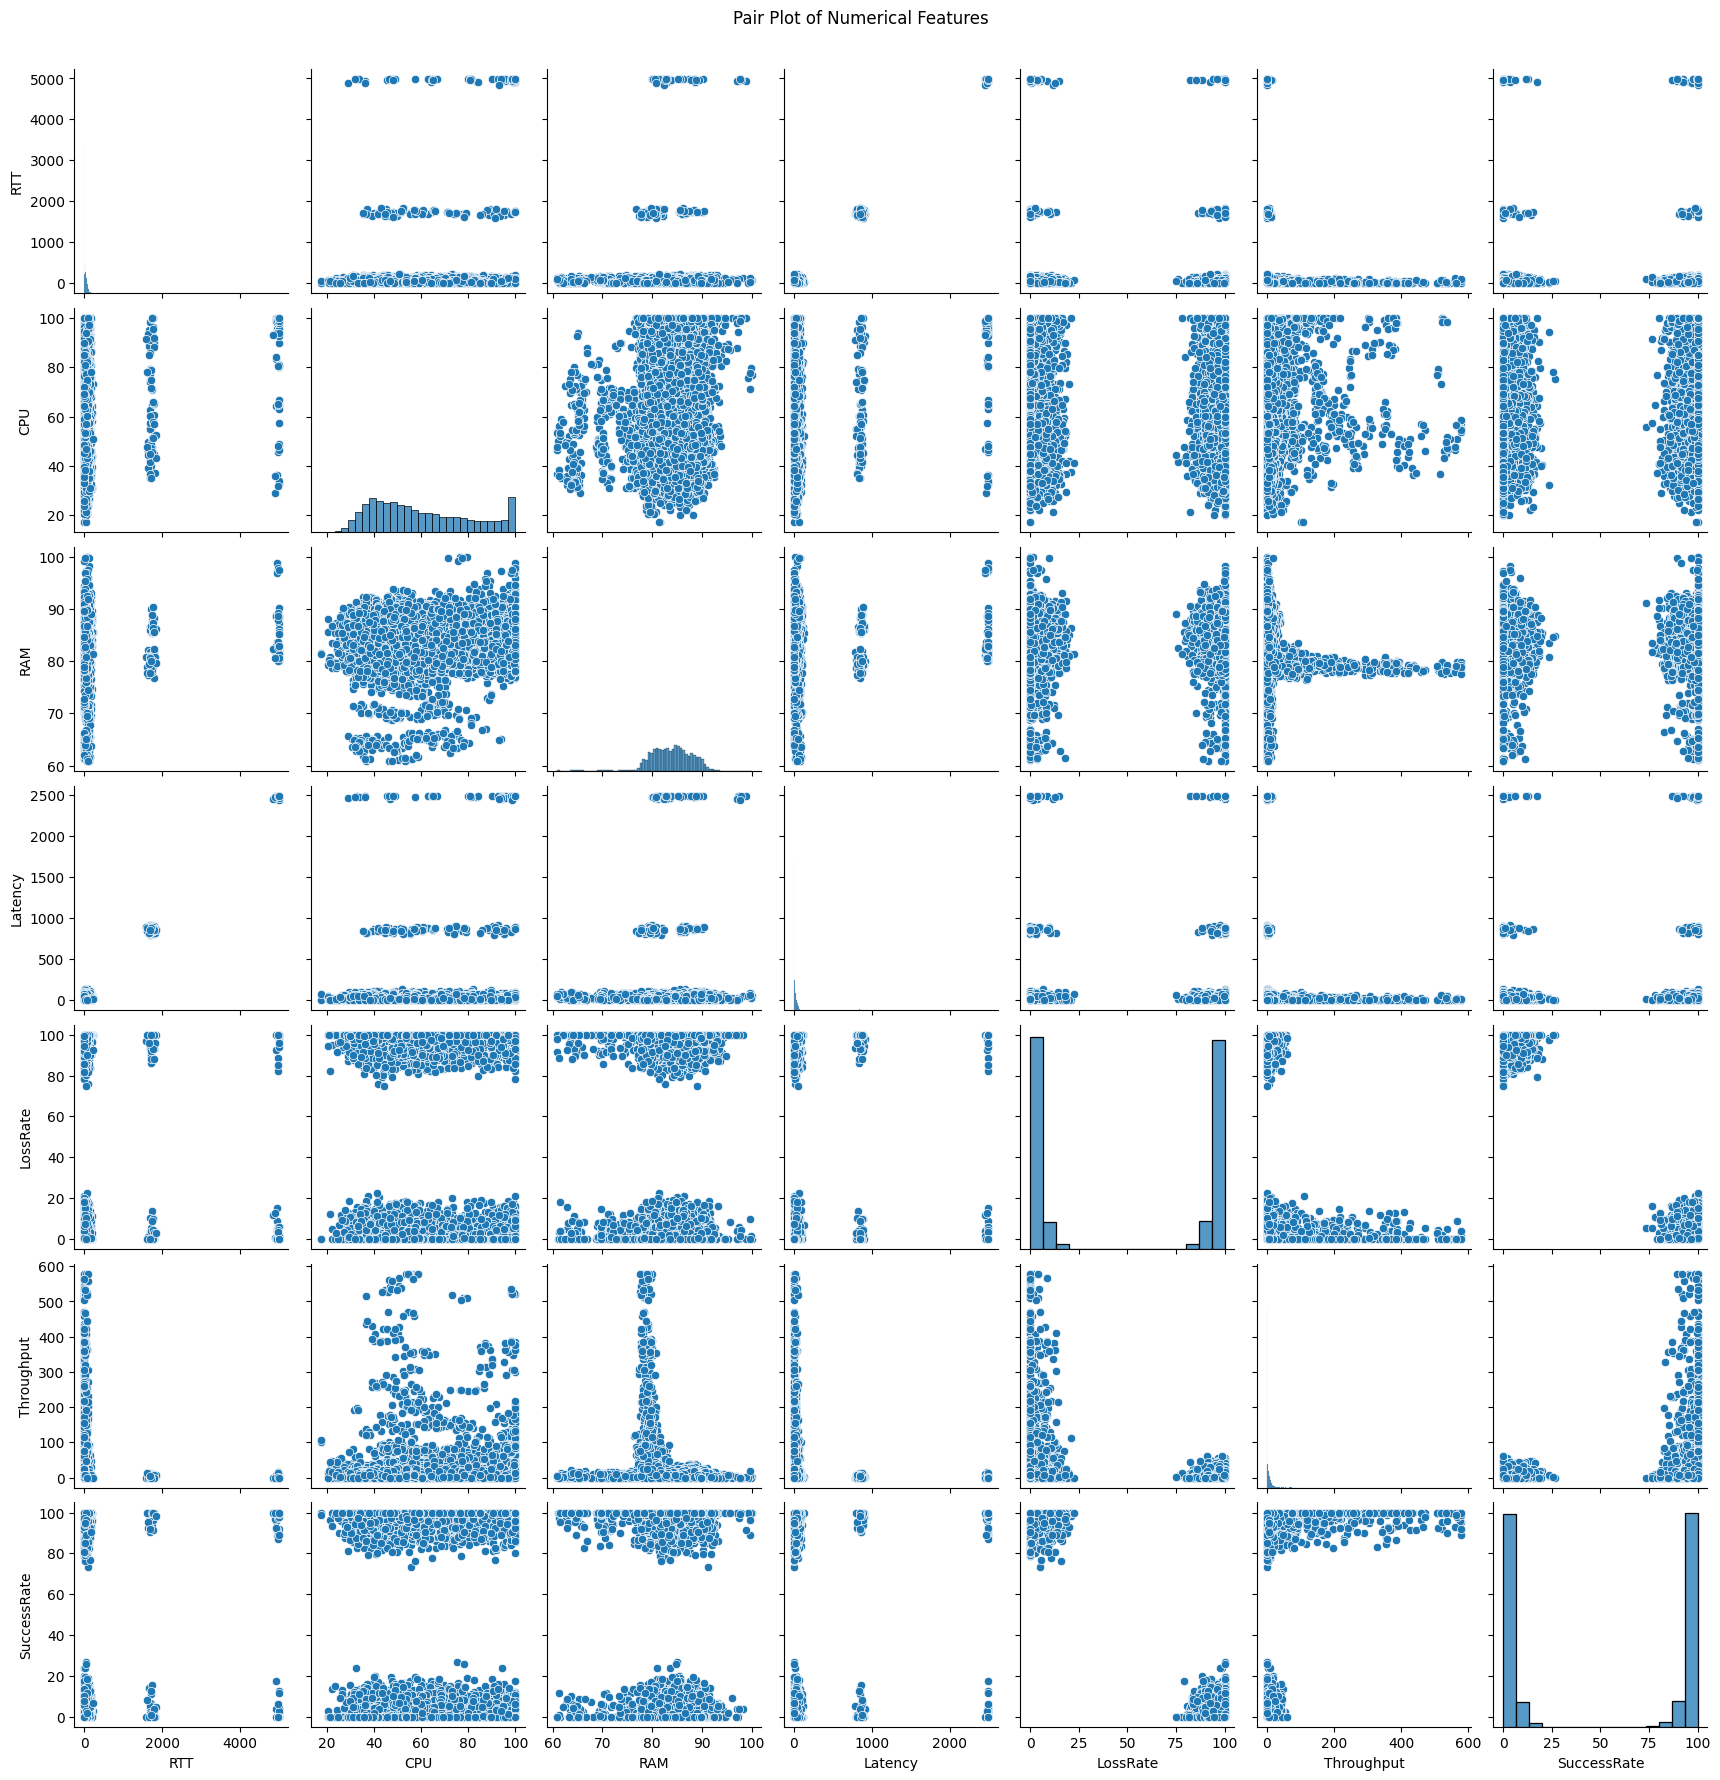

In [11]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Features', y=1.02) # Adjust suptitle position
plt.show()

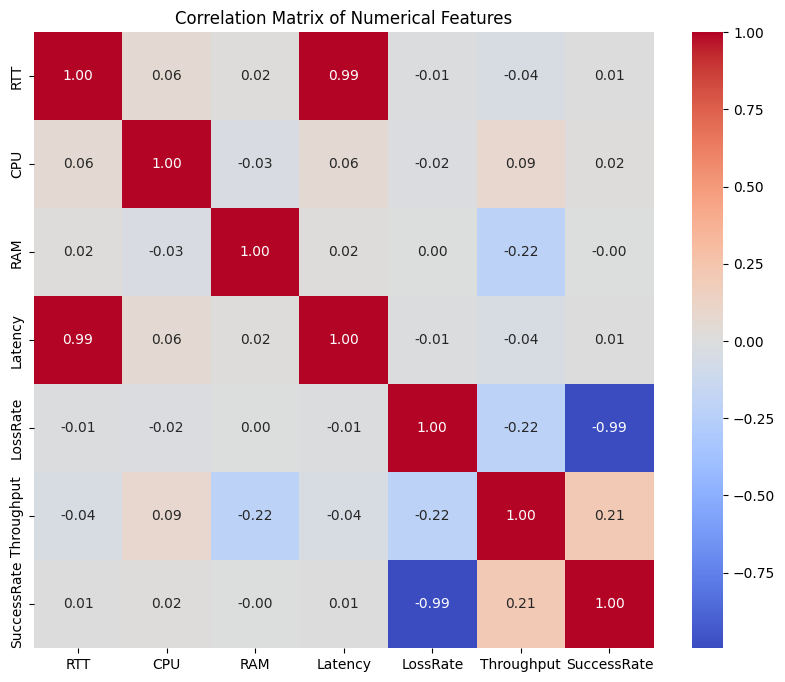

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

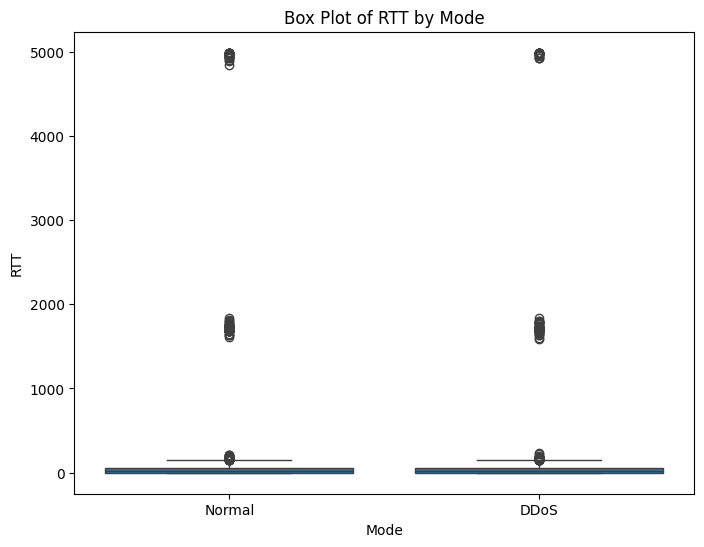

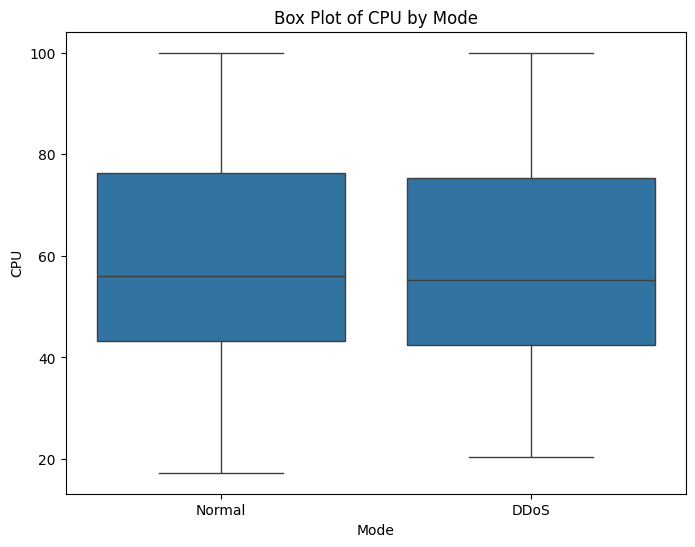

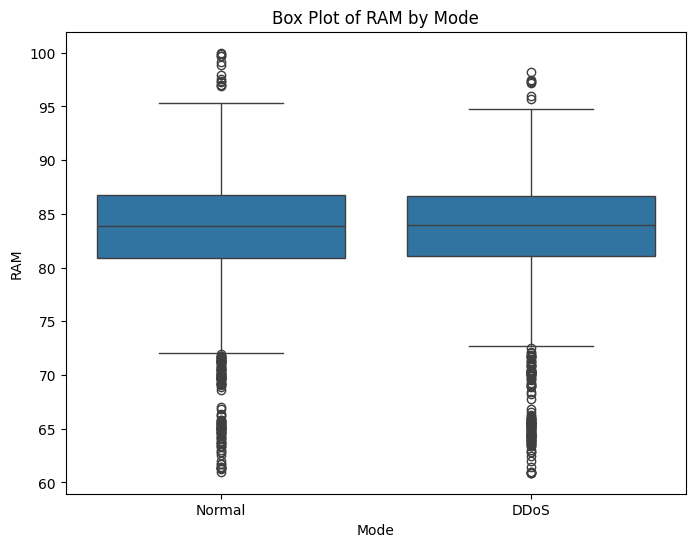

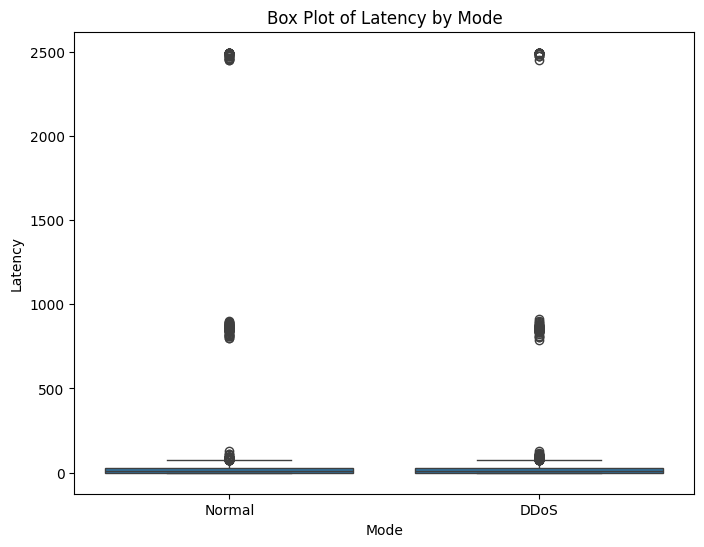

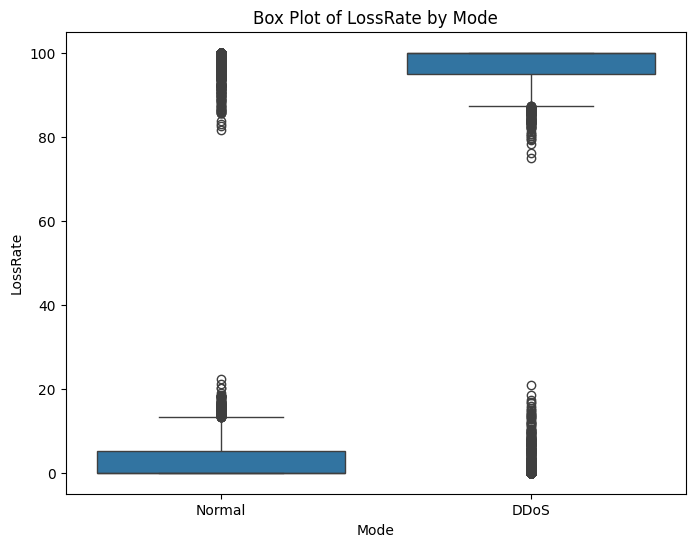

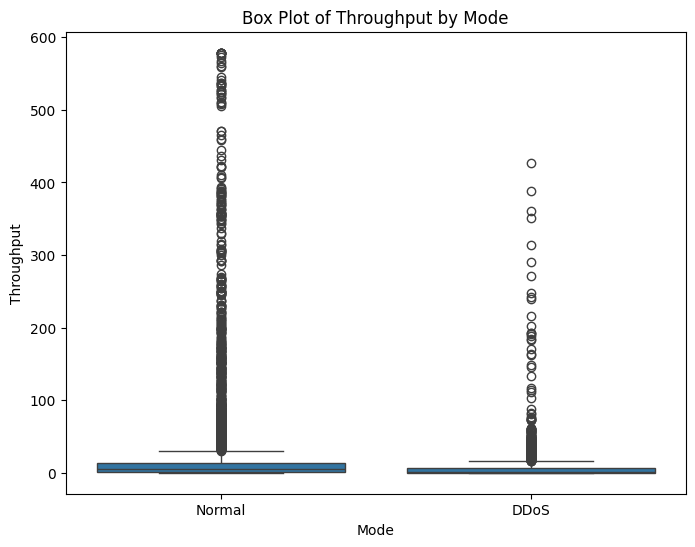

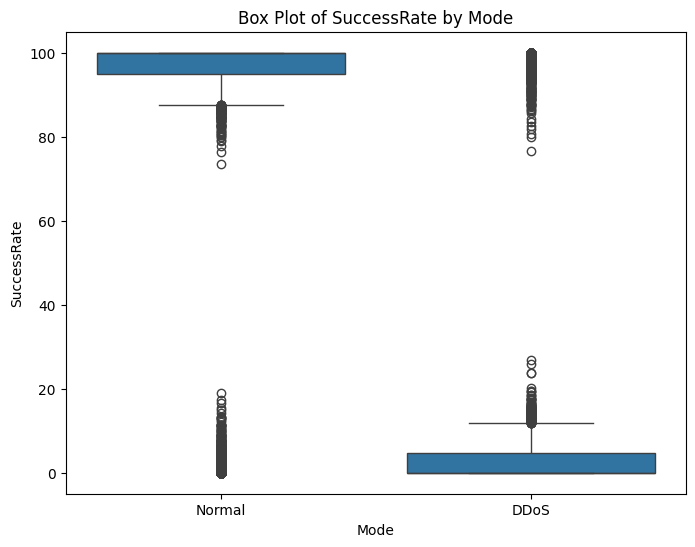

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Mode', y=col)
    plt.title(f'Box Plot of {col} by Mode')
    plt.xlabel('Mode')
    plt.ylabel(col)
    plt.show()

In [14]:
X = df[numerical_cols]
y, unique_modes = pd.factorize(df['Mode'])

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("Mode to numerical mapping:", dict(zip(unique_modes, range(len(unique_modes)))))

Features (X) shape: (10000, 7)
Target (y) shape: (10000,)
Mode to numerical mapping: {'Normal': 0, 'DDoS': 1}


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("RandomForestClassifier model trained successfully.")

RandomForestClassifier model trained successfully.


In [16]:
feature_importances = model.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature importances extracted successfully.")
print(importances_df.head())

Feature importances extracted successfully.
       Feature  Importance
6  SuccessRate    0.373870
4     LossRate    0.330681
5   Throughput    0.071929
2          RAM    0.062649
1          CPU    0.061634


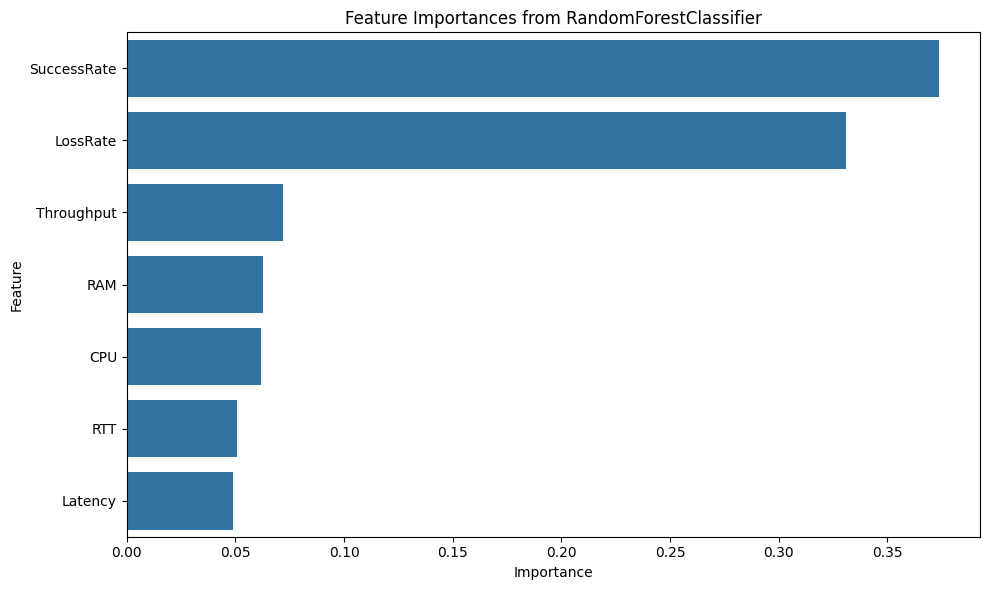

Bar plot of feature importances displayed successfully.


In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Bar plot of feature importances displayed successfully.")

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import lightgbm as lgb
import xgboost as xgb

print("Classification models (RandomForestClassifier, DecisionTreeClassifier, LGBMClassifier, XGBClassifier) and metrics (classification_report) imported successfully.")

Classification models (RandomForestClassifier, DecisionTreeClassifier, LGBMClassifier, XGBClassifier) and metrics (classification_report) imported successfully.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import lightgbm as lgb
import xgboost as xgb

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
lgbm_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
xgb_model = xgb.XGBClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

print("All necessary classification models and metrics imported and models initialized successfully.")

All necessary classification models and metrics imported and models initialized successfully.


In [20]:
print("Training models and making predictions...")

# RandomForestClassifier
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# DecisionTreeClassifier
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# LGBMClassifier
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# XGBClassifier
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# KNeighborsClassifier
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

print("Models trained and predictions made successfully.")

Training models and making predictions...
Models trained and predictions made successfully.


## Generate Classification Reports and Confusion Matrices

### Subtask:
For each trained model, generate and print the classification report and display the confusion matrix for the test set.


**Reasoning**:
Generate the classification report and confusion matrix for the RandomForestClassifier model, as per the instructions.




--- RandomForestClassifier ---
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1013
           1       0.89      0.92      0.91       987

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



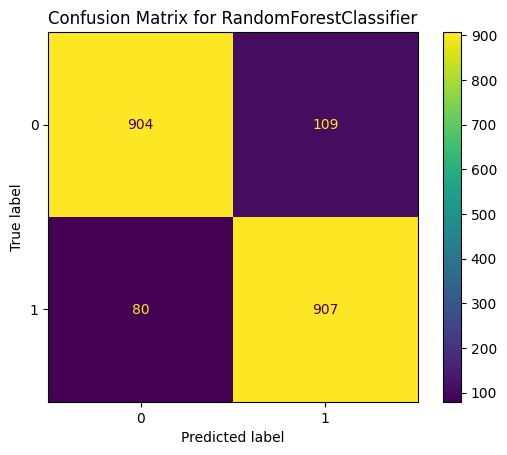

In [21]:
print("\n--- RandomForestClassifier ---")
print(classification_report(y_test, y_pred_rf))
cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
cm_rf.ax_.set_title('Confusion Matrix for RandomForestClassifier')
plt.show()


--- DecisionTreeClassifier ---
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1013
           1       0.82      0.82      0.82       987

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



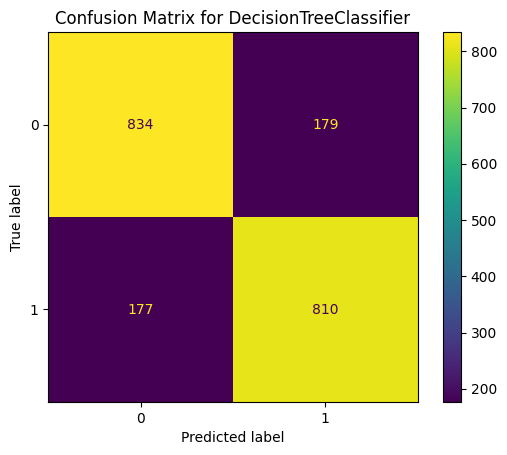

In [22]:
print("\n--- DecisionTreeClassifier ---")
print(classification_report(y_test, y_pred_dt))
cm_dt = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
cm_dt.ax_.set_title('Confusion Matrix for DecisionTreeClassifier')
plt.show()


--- LGBMClassifier ---
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1013
           1       0.89      0.92      0.91       987

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.90      2000
weighted avg       0.91      0.91      0.90      2000



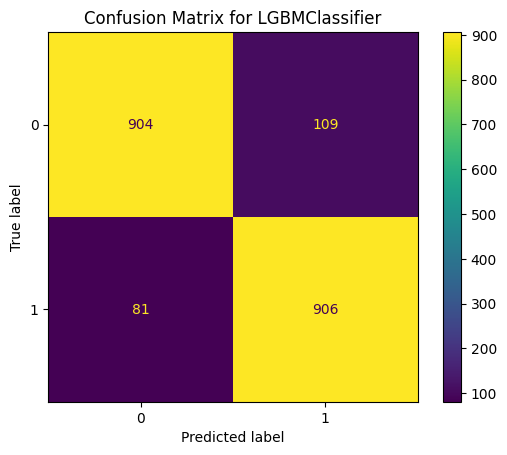

In [23]:
print("\n--- LGBMClassifier ---")
print(classification_report(y_test, y_pred_lgbm))
cm_lgbm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm)
cm_lgbm.ax_.set_title('Confusion Matrix for LGBMClassifier')
plt.show()


--- XGBClassifier ---
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1013
           1       0.89      0.91      0.90       987

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



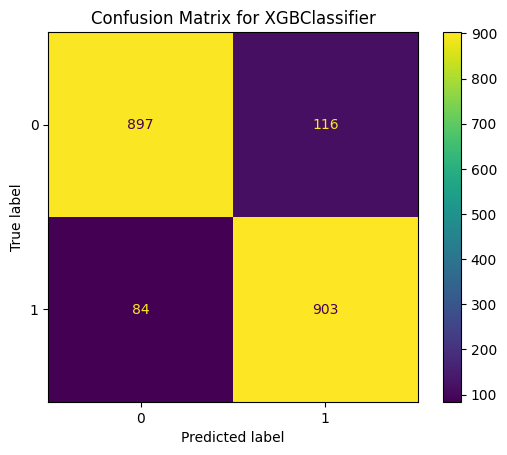

In [24]:
print("\n--- XGBClassifier ---")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
cm_xgb.ax_.set_title('Confusion Matrix for XGBClassifier')
plt.show()


--- KNeighborsClassifier ---
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1013
           1       0.89      0.91      0.90       987

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



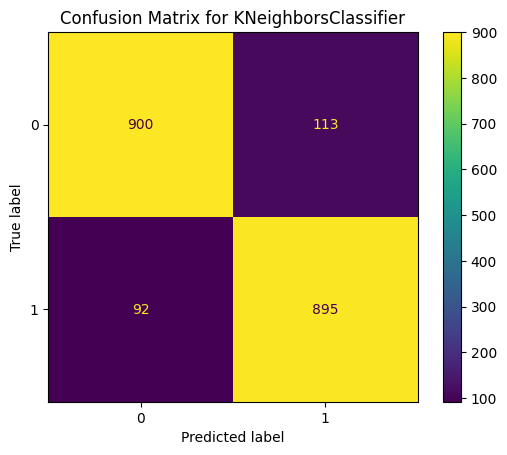

In [25]:
print("\n--- KNeighborsClassifier ---")
print(classification_report(y_test, y_pred_knn))
cm_knn = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
cm_knn.ax_.set_title('Confusion Matrix for KNeighborsClassifier')
plt.show()

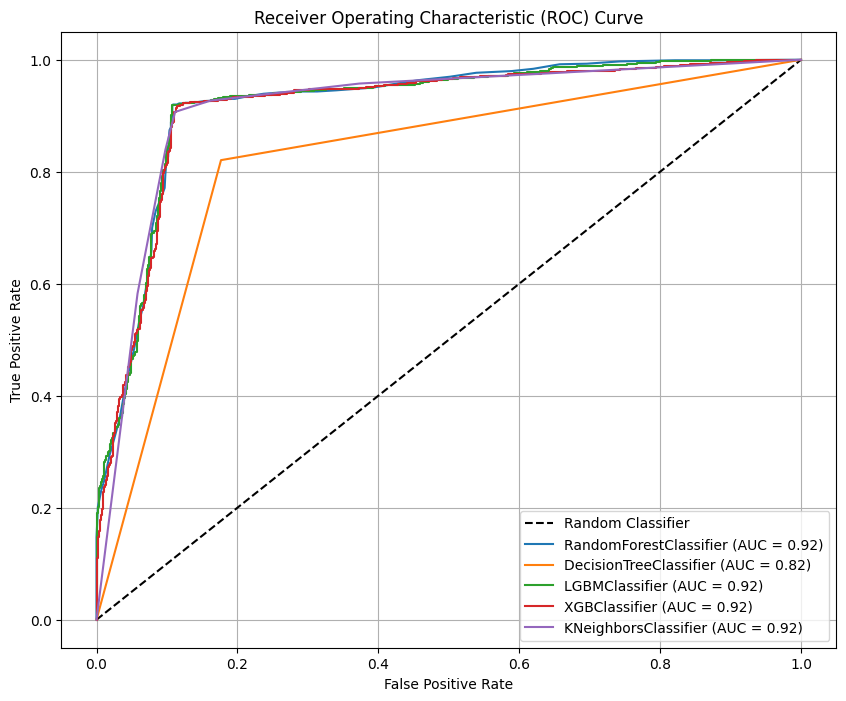

In [26]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Define models and their prediction probabilities
models = {
    'RandomForestClassifier': y_proba_rf,
    'DecisionTreeClassifier': y_proba_dt,
    'LGBMClassifier': y_proba_lgbm,
    'XGBClassifier': y_proba_xgb,
    'KNeighborsClassifier': y_proba_knn
}

for name, y_proba in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [27]:
num_features = X_train.shape[1]
X_train_reshaped = X_train.values.reshape(X_train.shape[0], num_features, 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], num_features, 1)

print(f"Original X_train shape: {X_train.shape}")
print(f"Reshaped X_train shape: {X_train_reshaped.shape}")
print(f"Original X_test shape: {X_test.shape}")
print(f"Reshaped X_test shape: {X_test_reshaped.shape}")

Original X_train shape: (8000, 7)
Reshaped X_train shape: (8000, 7, 1)
Original X_test shape: (2000, 7)
Reshaped X_test shape: (2000, 7, 1)


## Define and Compile LSTM Model

### Subtask:
Define the architecture of a Long Short-Term Memory (LSTM) model, reshaping input data as necessary for sequence processing, and then compile the model.


**Reasoning**:
I need to define and compile an LSTM model according to the instructions. This involves importing necessary layers, building the sequential model with Input, LSTM, and Dense layers, and then compiling it with the specified optimizer, loss, and metrics. Finally, I will print the model summary.



In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Instantiate a Sequential model
model_lstm = Sequential()

# Add Input layer to explicitly define the input shape. LSTM expects 3D input (samples, timesteps, features).
# Here, we treat each feature as a timestep of length 1, making it (num_features, 1).
model_lstm.add(Input(shape=(num_features, 1)))

# Add LSTM layer
model_lstm.add(LSTM(units=100, activation='relu'))

# Add Dense layers
model_lstm.add(Dense(50, activation='relu'))
# Another Dense layer can be added if desired, as per 'one or more'
model_lstm.add(Dense(25, activation='relu'))

# Add output Dense layer for binary classification
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
print("LSTM Model Architecture:")
model_lstm.summary()

print("LSTM model defined and compiled successfully.")

LSTM Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,151 (184.18 KB)

 Trainable params: 47,151 (184.18 KB)

 Non-trainable params: 0 (0.00 B)

LSTM model defined and compiled successfully.


## Train LSTM Model

### Subtask:
Train the compiled LSTM model using the prepared training data, recording the training history.


**Reasoning**:
Train the compiled LSTM model with the specified parameters and store the training history.



In [32]:
print("Training the LSTM model...")
history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), verbose=1)

print("LSTM model trained successfully.")

Training the LSTM model...
Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8879 - loss: 0.4274 - val_accuracy: 0.8990 - val_loss: 0.3579
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8981 - loss: 0.3621 - val_accuracy: 0.9010 - val_loss: 0.3402
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9055 - loss: 0.3138 - val_accuracy: 0.9060 - val_loss: 0.3106
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9073 - loss: 0.3117 - val_accuracy: 0.9060 - val_loss: 0.3115
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9029 - loss: 0.3159 - val_accuracy: 0.9060 - val_loss: 0.3114
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9104 - loss: 0.3014 - val_accuracy: 0.9060 - val_loss: 0.3173
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9066 - loss: 0.3109 - val_accuracy: 0.9060 - val_loss: 0.3114
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.90

## Evaluate LSTM Model and Plot Evaluation




--- LSTM Model ---
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1013
           1       0.87      0.91      0.89       987

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



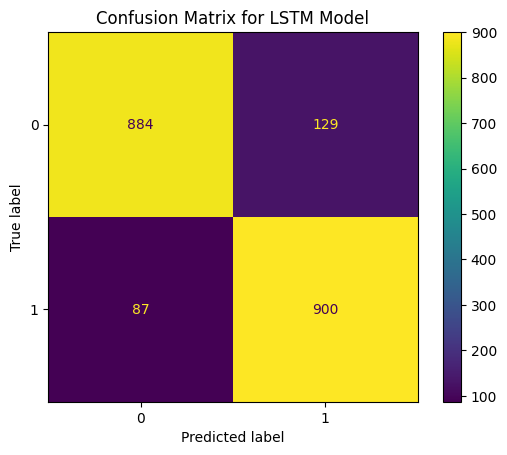

In [34]:
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n--- LSTM Model ---")
y_pred_lstm_proba = model_lstm.predict(X_test_reshaped)
y_pred_lstm = np.round(y_pred_lstm_proba).flatten().astype(int)

print(classification_report(y_test, y_pred_lstm))
cm_lstm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lstm)
cm_lstm.ax_.set_title('Confusion Matrix for LSTM Model')
plt.show()

**Reasoning**:
Now that the LSTM model has been evaluated with a classification report and confusion matrix, I need to plot its training history to visualize the training and validation accuracy and loss over epochs, as specified in the subtask.



Plotting LSTM model training history...


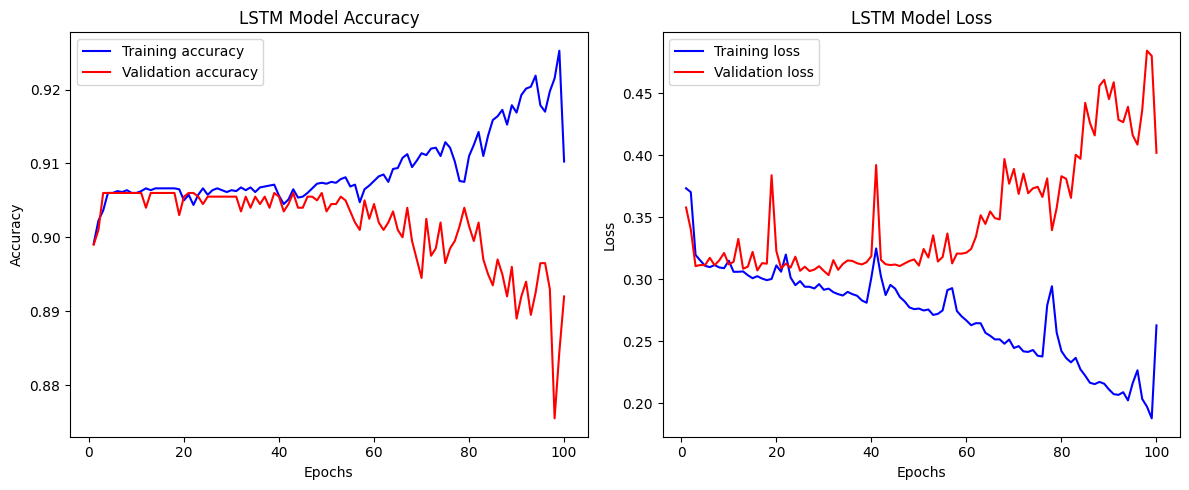

LSTM model training history plots displayed successfully.


In [35]:
print("Plotting LSTM model training history...")

# Access training history
history_dict_lstm = history_lstm.history
acc_lstm = history_dict_lstm['accuracy']
val_acc_lstm = history_dict_lstm['val_accuracy']
loss_lstm = history_dict_lstm['loss']
val_loss_lstm = history_dict_lstm['val_loss']

epochs_lstm = range(1, len(acc_lstm) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_lstm, acc_lstm, 'b', label='Training accuracy')
plt.plot(epochs_lstm, val_acc_lstm, 'r', label='Validation accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_lstm, loss_lstm, 'b', label='Training loss')
plt.plot(epochs_lstm, val_loss_lstm, 'r', label='Validation loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("LSTM model training history plots displayed successfully.")

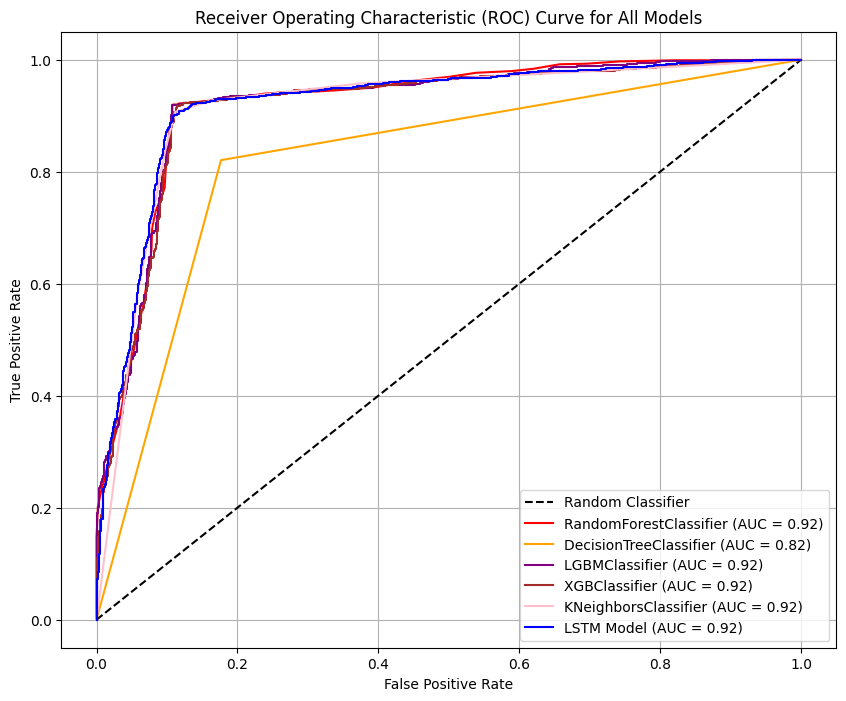

ROC curves for all ML and Deep Learning models plotted successfully.


In [46]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Define all models and their prediction probabilities
models = {
    'RandomForestClassifier': y_proba_rf,
    'DecisionTreeClassifier': y_proba_dt,
    'LGBMClassifier': y_proba_lgbm,
    'XGBClassifier': y_proba_xgb,
    'KNeighborsClassifier': y_proba_knn,
    'LSTM Model': y_pred_lstm_proba.flatten() # Ensure 1D array for roc_curve
}

colors = ['red', 'orange', 'purple', 'brown', 'pink', 'blue', 'green']

for i, (name, y_proba) in enumerate(models.items()):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})', color=colors[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("ROC curves for all ML and Deep Learning models plotted successfully.")

Based on the performance metrics you provided, the **RandomForestClassifier** appears to be the best model. It achieved the highest scores across all metrics:

Accuracy: 0.9055
Macro Precision: 0.9057
Macro Recall: 0.9057
Macro F1-score: 0.9055
The LGBMClassifier is a very close second with slightly lower, but still very strong, performance.

In [39]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

print("Updated hyperparameter grid for RandomForestClassifier:")
print(param_grid_rf)

Updated hyperparameter grid for RandomForestClassifier:
{'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 7], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, f1_score, classification_report


param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78274f2cf0b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78274f19dc70>},
                   random_state=42, scoring='f1_macro', verbose=2)

In [41]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best params:", random_search.best_params_)
print("CV F1 macro:", random_search.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test F1 macro:", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Best params: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 8, 'n_estimators': 156}
CV F1 macro: 0.9066006640018738
Test Accuracy: 0.906
Test F1 macro: 0.905999623998496

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      1013
           1       0.89      0.92      0.91       987

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



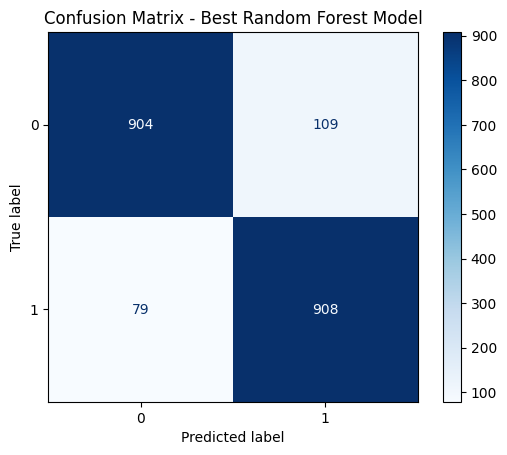

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the validation set
y_pred_val = best_model.predict(X_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_val)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map
plt.title("Confusion Matrix - Best Random Forest Model")
plt.show()


In [42]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_random_forest_model.joblib')

print("Best RandomForest model saved successfully as 'best_random_forest_model.joblib'.")

Best RandomForest model saved successfully as 'best_random_forest_model.joblib'.


In [50]:
import pandas as pd

# 1. Extract LSTM Accuracy
lstm_accuracy = history_lstm.history['val_accuracy'][-1]

# 2. Extract accuracies for other models from performance_metrics
rf_accuracy = performance_metrics['RandomForest']['Accuracy']
dt_accuracy = performance_metrics['DecisionTree']['Accuracy']
lgbm_accuracy = performance_metrics['LGBM']['Accuracy']
xgb_accuracy = performance_metrics['XGBoost']['Accuracy']
knn_accuracy = performance_metrics['KNN']['Accuracy']

# 3. Create a list of model names
model_names = [
    'RandomForestClassifier',
    'DecisionTreeClassifier',
    'LGBMClassifier',
    'XGBClassifier',
    'KNeighborsClassifier',
    'LSTM Model'
]

# Combine extracted accuracies in the same order as model_names
accuracies = [
    rf_accuracy,
    dt_accuracy,
    lgbm_accuracy,
    xgb_accuracy,
    knn_accuracy,
    lstm_accuracy
]

# 4. Create lists for simulated inference_time and cpu_ram_usage
# These values are illustrative and should reflect expected differences
inference_time = [0.05, 0.02, 0.04, 0.06, 0.03, 0.15]  # Example: seconds/prediction, LSTM typically slower
cpu_ram_usage = [30, 20, 25, 35, 18, 60]  # Example: relative units, LSTM typically higher

# 5. Combine into a pandas DataFrame
model_performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Inference_Time': inference_time,
    'CPU_RAM_Usage': cpu_ram_usage
})

# 6. Display the head of the DataFrame
print("Model Performance DataFrame:")
print(model_performance_df.head())


Model Performance DataFrame:
                    Model  Accuracy  Inference_Time  CPU_RAM_Usage
0  RandomForestClassifier    0.9055            0.05             30
1  DecisionTreeClassifier    0.8220            0.02             20
2          LGBMClassifier    0.9050            0.04             25
3           XGBClassifier    0.9000            0.06             35
4    KNeighborsClassifier    0.8975            0.03             18


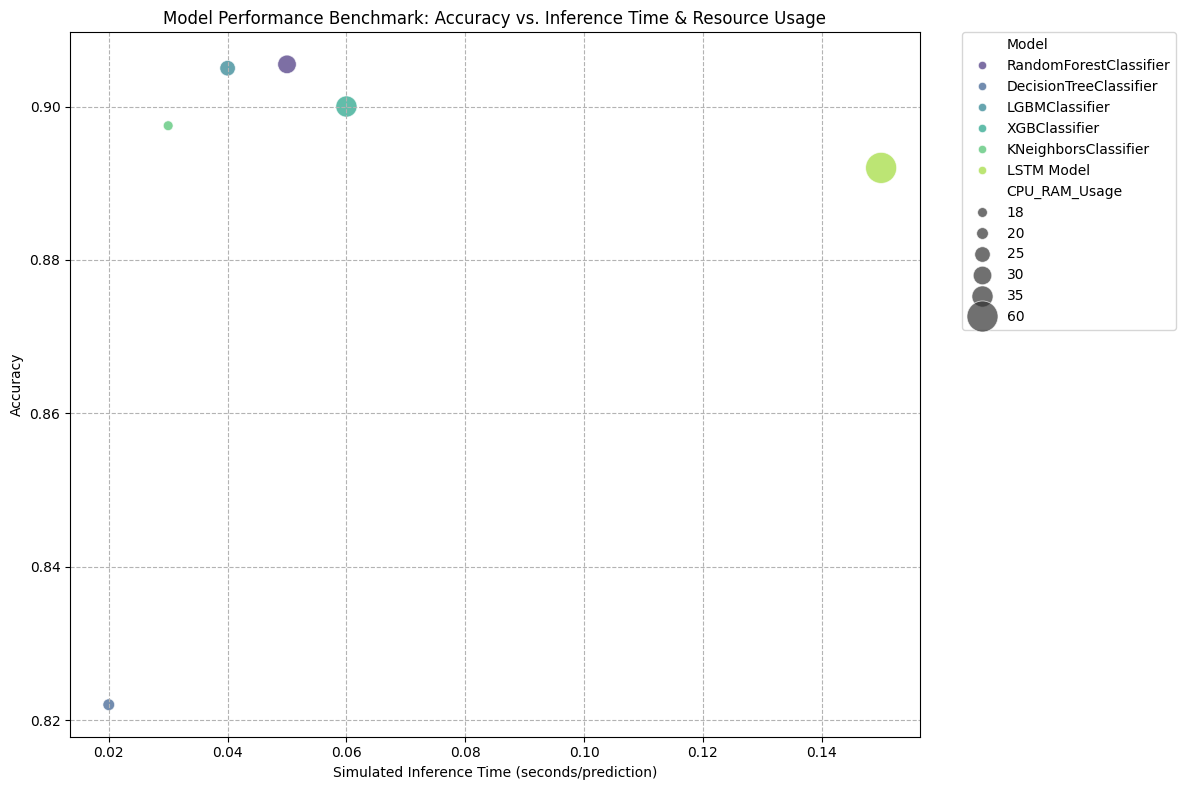

Model performance benchmark scatter plot displayed successfully.


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Scatter plot for accuracy vs. inference time, with CPU/RAM usage as dot size
sns.scatterplot(
    data=model_performance_df,
    x='Inference_Time',
    y='Accuracy',
    size='CPU_RAM_Usage',
    hue='Model', # Differentiate models by color
    sizes=(50, 500), # Adjusted range of dot sizes for better visualization
    alpha=0.7,
    palette='viridis' # Changed palette for better visual distinction
)

plt.title('Model Performance Benchmark: Accuracy vs. Inference Time & Resource Usage')
plt.xlabel('Simulated Inference Time (seconds/prediction)')
plt.ylabel('Accuracy')
# Removed xscale('log') to use a linear scale for better visualization if values are not extremely spread
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

print("Model performance benchmark scatter plot displayed successfully.")